### Dipika Sharma
#### Project 3: Song Recommender System
#### DSC680, Weeks 9 - 12

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Lets import the data from csv file

df_tracks = pd.read_csv('tracks_transformed.csv')
dftracks = pd.read_csv('tracks_transformed.csv')


## Lets see how the data looks
df_tracks.head()

,id,name,artists,id_artists,genres,release_year,duration_s,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,35iwgR4jXetI318WEWsa1Q,Carve,Uli,['45tIt06XoI0Iio4LBEVpls'],NaN,1922,126.903,6,0.645,0.4450,0,46.662,1,0.4510,0.674,0.7440,0.151,0.127,104.851
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],NaN,1922,98.200,0,0.695,0.2630,0,37.864,1,0.9570,0.797,0.0000,0.148,0.655,102.009
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],tango vintage tango,1922,181.640,0,0.434,0.1770,1,38.820,1,0.0512,0.994,0.0218,0.212,0.457,130.418
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],tango vintage tango,1922,176.907,0,0.321,0.0946,7,32.039,1,0.0504,0.995,0.9180,0.104,0.397,169.980
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],adult standards big band easy listening lounge...,1922,163.080,0,0.402,0.1580,3,43.100,0,0.0390,0.989,0.1300,0.311,0.196,103.220


In [3]:
## Lets import the artists data from csv file
df_artists = pd.read_csv('artists_transformed.csv')

## Lets drop the null values
df_artists.dropna(inplace=True)

In [4]:
## Lets convert the follower field to numeric
df_artists['followers'] = pd.to_numeric(df_artists['followers'])

## Lets see how the data looks now. 
df_artists.head()

,id,followers,genres,name,popularity
45,0VLMVnVbJyJ4oyZs2L3Yl2,71.0,carnaval cadiz,Las Viudas De Los Bisabuelos,6
46,0dt23bs4w8zx154C5xdVyl,63.0,carnaval cadiz,Los De Capuchinos,5
47,0pGhoB99qpEJEsBQxgaskQ,64.0,carnaval cadiz,Los “Pofesionales”,7
48,3HDrX2OtSuXLW5dLR85uN3,53.0,carnaval cadiz,Los Que No Paran De Rajar,6
136,22mLrN5fkppmuUPsHx6i2G,59.0,classical harp harp,Vera Dulova,3


In [5]:
## Lets import the genres data from csv file
df_genres = pd.read_csv('data_by_genres_o.csv', na_filter=False)

## Lets see how the data looks
df_genres.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [6]:
## Lets see how many rows and columns we have in track dataset
df_tracks.shape

(586672, 19)

#### As we can see we have 19 columns and 586672 rows in track dataset.

In [7]:
## Lets use info() function to see data type
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   artists           586601 non-null  object 
 3   id_artists        586672 non-null  object 
 4   genres            536847 non-null  object 
 5   release_year      586672 non-null  int64  
 6   duration_s        586672 non-null  float64
 7   popularity        586672 non-null  int64  
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [8]:
## Lets see how many null values we have in track dataset.
df_tracks.isnull().sum()

id                      0
name                   71
artists                71
id_artists              0
genres              49825
release_year            0
duration_s              0
popularity              0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
dtype: int64

#### Looking at the above result we can clearly stat that column genres have 49825 rows with missing values

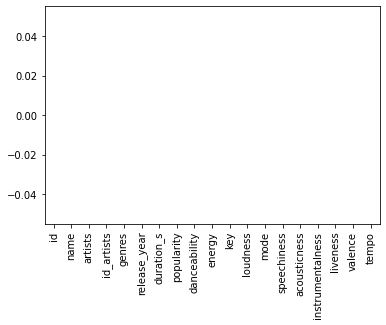

In [9]:
## Lets drop the null values so that it will not affect the results.
df_tracks.dropna(inplace = True)
dftracks.dropna(inplace = True)
df_tracks.isnull().sum().plot.bar()
plt.show()

#### This is the most important feature, which will be used in song recommender system to recommend the songs to the users and hence it need to be treated. For resolving the missing values issues I am removing the 50,000 rows from our dataset. Our dataset has more than 500K rows and removing 50K rows will not impact the dataset.

In [10]:
## Lets remove the columns that we do not need in our analysis
df_tracks = df_tracks.drop(['id', 'artists'], axis = 1)
dftracks = dftracks.drop(['id', 'id_artists'], axis = 1)

### Exploratory Data Analysis

In [11]:
## Lets see the data again
df_tracks = pd.read_csv('tracks_transformed.csv')
df_tracks.head()

,id,name,artists,id_artists,genres,release_year,duration_s,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,35iwgR4jXetI318WEWsa1Q,Carve,Uli,['45tIt06XoI0Iio4LBEVpls'],NaN,1922,126.903,6,0.645,0.4450,0,46.662,1,0.4510,0.674,0.7440,0.151,0.127,104.851
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],NaN,1922,98.200,0,0.695,0.2630,0,37.864,1,0.9570,0.797,0.0000,0.148,0.655,102.009
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],tango vintage tango,1922,181.640,0,0.434,0.1770,1,38.820,1,0.0512,0.994,0.0218,0.212,0.457,130.418
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],tango vintage tango,1922,176.907,0,0.321,0.0946,7,32.039,1,0.0504,0.995,0.9180,0.104,0.397,169.980
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],adult standards big band easy listening lounge...,1922,163.080,0,0.402,0.1580,3,43.100,0,0.0390,0.989,0.1300,0.311,0.196,103.220


In [12]:
## Lets use describe function to learn about data statistics
df_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
release_year,586672.0,1988.566168,22.831283,1900.000,1974.0000,1992.000000,2007.00000,2021.000
duration_s,586672.0,230.051167,126.526087,3.344,175.0930,214.893000,263.86700,5621.218
popularity,586672.0,27.570053,18.370642,0.000,13.0000,27.000000,41.00000,100.000
danceability,586672.0,0.563594,0.166103,0.000,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.000,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.000,2.0000,5.000000,8.00000,11.000
loudness,586672.0,49.793933,5.089328,0.000,47.1090,50.757000,53.51800,65.376
mode,586672.0,0.658797,0.474114,0.000,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.000,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.000,0.0969,0.422000,0.78500,0.996


In [13]:
## Lets use the describe function again to see statistics summary for artists dataset.
df_artists.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
followers,298610.0,38506.674743,500715.449177,0.0,157.0,894.0,5221.75,78900234.0
popularity,298610.0,19.535937,17.527959,0.0,4.0,16.0,32.00,100.0


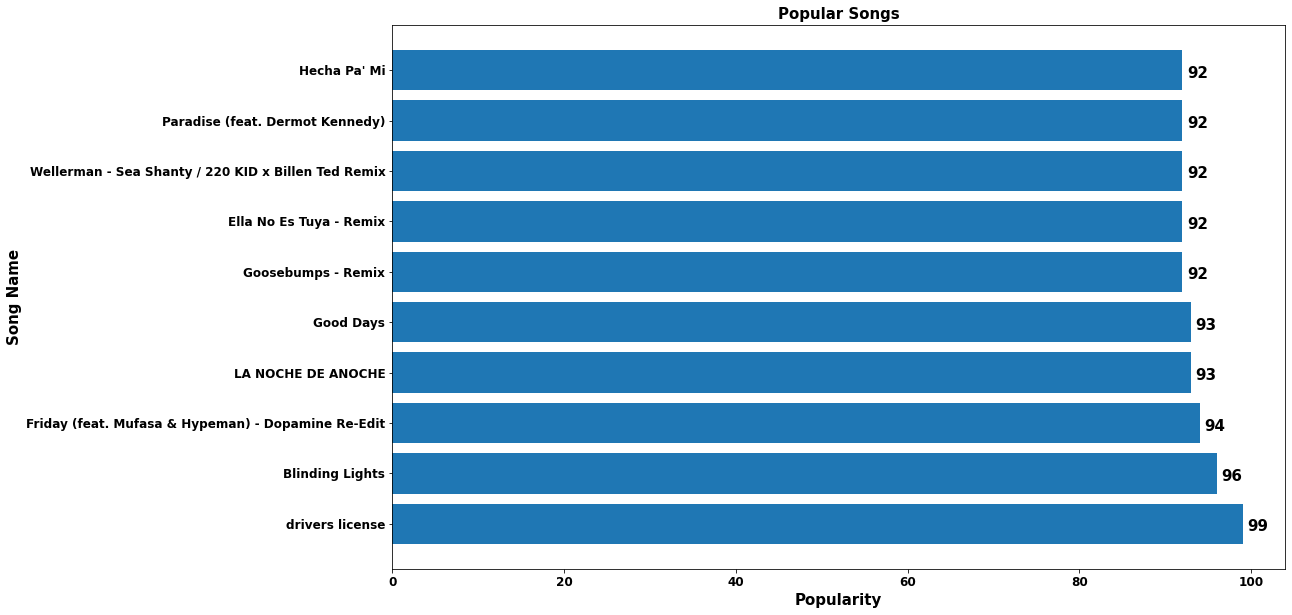

In [14]:
## Lets see the top 10 popular tracks in dataset.
popular_songs = df_tracks.groupby('name')['popularity'].mean().sort_values(ascending=False).head(10)

## Lets create the horizontal bar chart
plt.figure(figsize=(16, 10))
plt.barh(popular_songs.index, popular_songs)

## Lets declare the title of the chart
plt.title('Popular Songs', fontdict=dict(fontsize=15), fontweight='bold')

## Lets declare the x-axis and y-axis labels
plt.xlabel('Popularity', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Song Name', fontdict=dict(fontsize=15), fontweight='bold')
plt.xticks(fontsize='large', weight='bold')
plt.yticks(fontsize='large', weight='bold')
for i, v in enumerate(popular_songs):
    plt.text(v+0.5, i-0.15, str(int(v)), fontdict=dict(fontsize=15), fontweight='bold')
plt.show()

#### As we can see the above visualization shows the top 10 most popular songs, the most popular song name is “driver license” with 99 popularity measure.

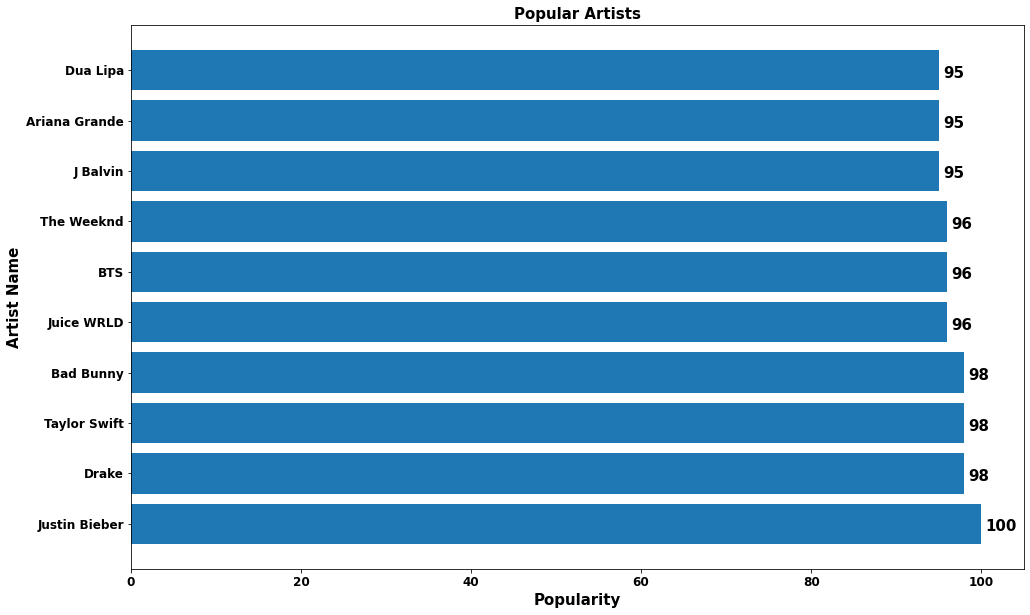

In [15]:
## Lets see the top 10 popular artists
popular_artists = df_artists.groupby('name')['popularity'].mean().sort_values(ascending=False).head(10)

## Lets create horizontal bar chart
plt.figure(figsize=(16, 10))
plt.barh(popular_artists.index, popular_artists)

## Lets declare the title of the chart
plt.title('Popular Artists', fontdict=dict(fontsize=15), fontweight='bold')

## Lets declare the x-axis and y-axis labels
plt.xlabel('Popularity', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Artist Name', fontdict=dict(fontsize=15), fontweight='bold')
plt.xticks(fontsize='large', weight='bold')
plt.yticks(fontsize='large', weight='bold')
for i, v in enumerate(popular_artists):
    plt.text(v+0.5, i-0.15, str(int(v)), fontdict=dict(fontsize=15), fontweight='bold')
plt.show()


#### The above chart shows that Justin Bieber is the most popular artist with popularity measure of 100. 

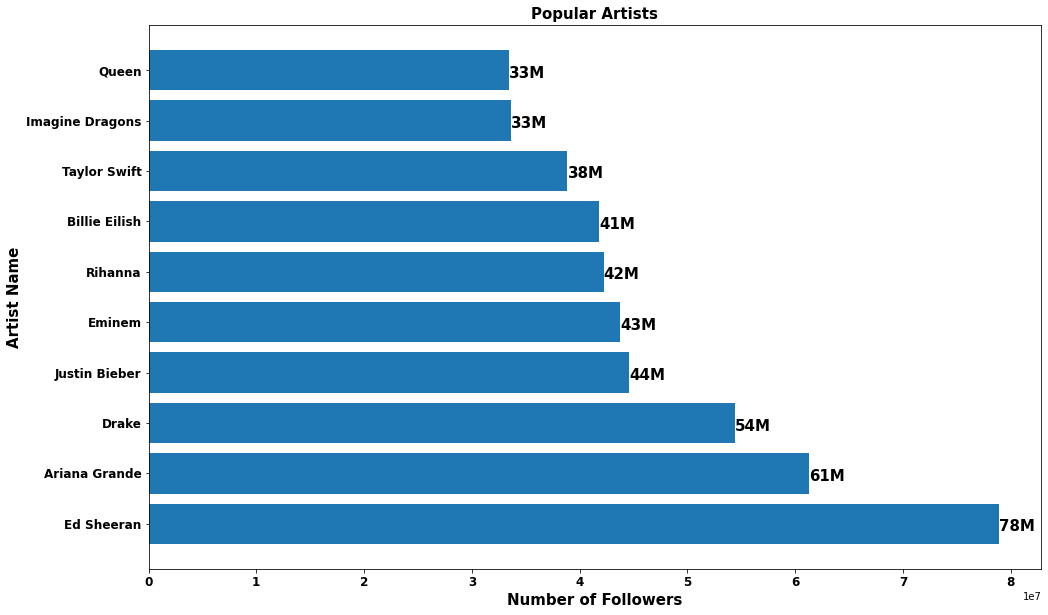

In [16]:
## Lets see the top 10 popular artists
popular_artists = df_artists.groupby('name')['followers'].mean().sort_values(ascending=False).head(10)

## Lets create horizontal bar chart
plt.figure(figsize=(16, 10))
plt.barh(popular_artists.index, popular_artists)

## Lets declare the title of the chart
plt.title('Popular Artists', fontdict=dict(fontsize=15), fontweight='bold')

## Lets declare the x-axis and y-axis labels
plt.xlabel('Number of Followers', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Artist Name', fontdict=dict(fontsize=15), fontweight='bold')
plt.xticks(fontsize='large', weight='bold')
plt.yticks(fontsize='large', weight='bold')
for i, v in enumerate(popular_artists):
    plt.text(v+0.5, i-0.15, str(int(v//1000000))+'M', fontdict=dict(fontsize=15), fontweight='bold')
plt.show()

#### As we can clearly see that the “Ed Sheeran” has most followers. The above visualization shows top 10 artist with most followers.

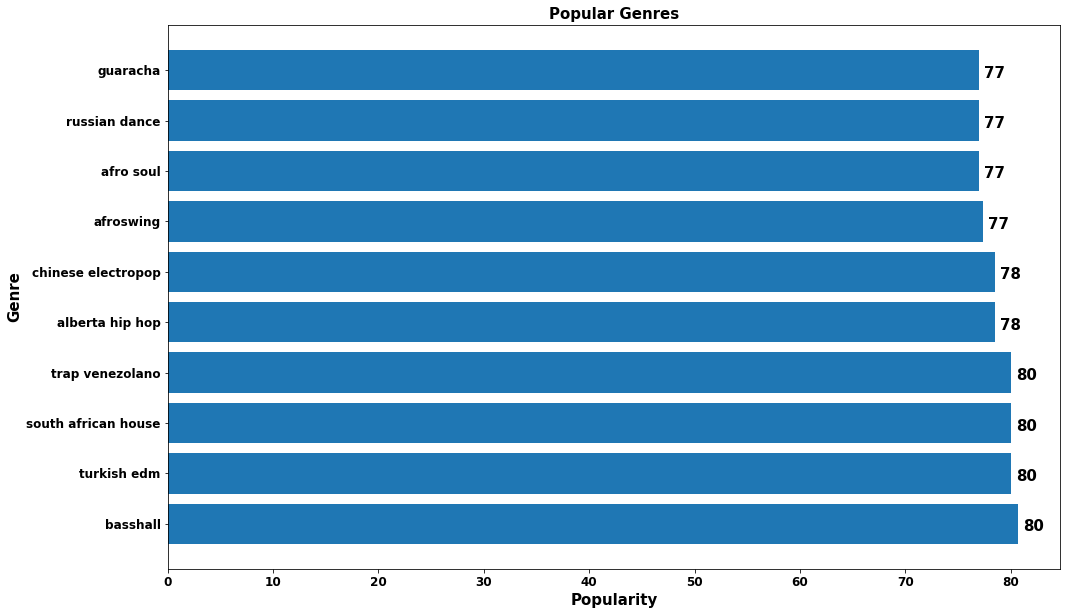

In [17]:
## Lets see the top 10 popular Genres
popular_genres = df_genres.groupby('genres')['popularity'].mean().sort_values(ascending=False).head(10)

## Lets create horizontal bar chart
plt.figure(figsize=(16, 10))
plt.barh(popular_genres.index, popular_genres)

## Lets declare the title of the chart
plt.title('Popular Genres', fontdict=dict(fontsize=15), fontweight='bold')

## Lets declare the x-axis and y-axis labels
plt.xlabel('Popularity', fontdict=dict(fontsize=15), fontweight='bold')
plt.ylabel('Genre', fontdict=dict(fontsize=15), fontweight='bold')
plt.xticks(fontsize='large', weight='bold')
plt.yticks(fontsize='large', weight='bold')
for i, v in enumerate(popular_genres):
    plt.text(v+0.5, i-0.15, str(int(v)), fontdict=dict(fontsize=15), fontweight='bold')
plt.show()


#### The above result shows the top 10 most popular genres. The genre with maximum popularity is basshall.

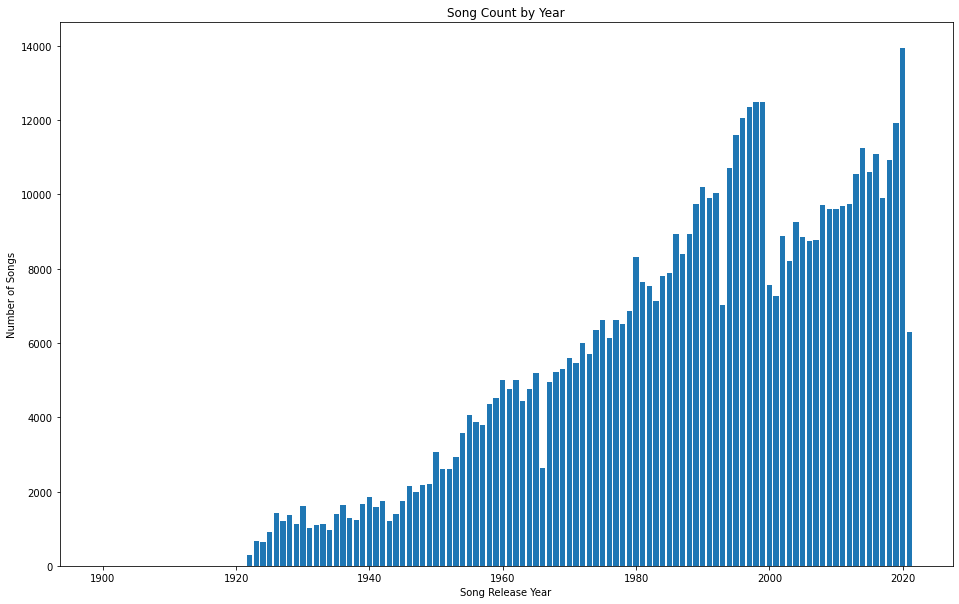

In [18]:
## Lets see how many song released by year
df_grouped = df_tracks.groupby('release_year')['id'].count().reset_index()

df_grouped.columns = ['release_year', 'count']
## Lets create bar graph
plt.figure(figsize=(16, 10))
plt.bar(df_grouped['release_year'], df_grouped['count'])

## Lets declare the x-axis and y-axis labels
plt.xlabel('Song Release Year')
plt.ylabel('Number of Songs')

## Lets declare the title of the chart
plt.title('Song Count by Year')

# Show the plot
plt.show()

#### As we can see the count of the songs is constantly increasing per year, the most songs were created in year 2020 and in year 1990. This visualization shows the successful years in the music industry.

In [21]:
## Lets see how many of same song version availbale in our dataset
dftracks['name'].nunique(), dftracks.shape

(408902, (536847, 17))

In [22]:
## Lets remove the same song version from the dataset to avoid recommended the same songs to the user.
dftracks = dftracks.sort_values(by=['popularity'], ascending=False)
dftracks.drop_duplicates(subset=['name'], keep='first', inplace=True)

In [23]:
## Let see how many columns we have with fload datatype
floats = []
for col in dftracks.columns:
  if dftracks[col].dtype == 'float':
    floats.append(col)
 
len(floats)

10

#### As we can above result shows we have 10 column with fload datatype

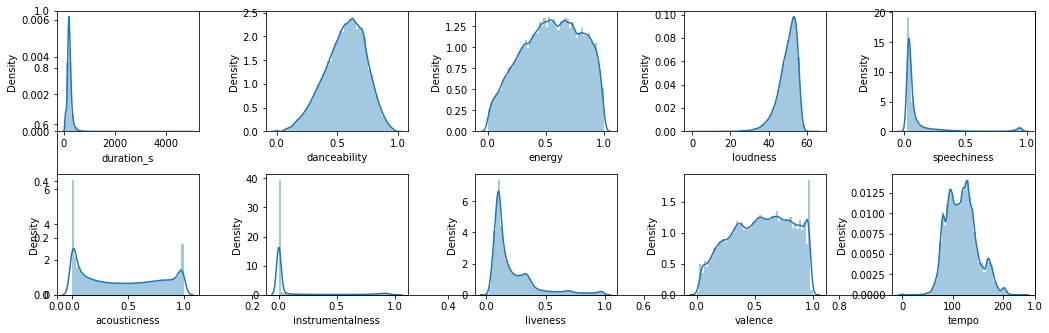

In [24]:
## Lets plot the distribution plot to understand the data
plt.subplots(figsize = (15, 5))
for i, col in enumerate(floats):
  plt.subplot(2, 5, i + 1)
  sb.distplot(dftracks[col])
plt.tight_layout()
plt.show()

#### As we can see above that some of the feature’s distribution is skewed as well as we see some of the features are normally distributed. 

#### Lets create the variable to convert the song lyrics into numerical vectors for processing.

In [25]:
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(dftracks['genres'])

In [26]:
## Depending on the popularity lets build the system with 10,000 songs
dftracks = dftracks.sort_values(by=['popularity'], ascending=False).head(10000)

In [27]:
## Creating a function to understand the similarities between the songs
def get_similarities(song_name, data):
   
  # Getting vector for the input song.
  text_array1 = song_vectorizer.transform(data[data['name']==song_name]['genres']).toarray()
  num_array1 = data[data['name']==song_name].select_dtypes(include=np.number).to_numpy()
   
  # We will store similarity for each row of the dataset.
  sim = []
  for idx, row in data.iterrows():
    name = row['name']
     
    # Getting vector for current song.
    text_array2 = song_vectorizer.transform(data[data['name']==name]['genres']).toarray()
    num_array2 = data[data['name']==name].select_dtypes(include=np.number).to_numpy()
 
    # Calculating similarities for text as well as numeric features
    text_sim = cosine_similarity(text_array1, text_array2)[0][0]
    num_sim = cosine_similarity(num_array1, num_array2)[0][0]
    sim.append(text_sim + num_sim)
     
  return sim

In [28]:
## Using the cosine similarity, Lets compare the vectors.
def recommend_songs(song_name, data=dftracks):
  # Base case
  if dftracks[dftracks['name'] == song_name].shape[0] == 0:
    print('This song is either not so popular or you\
    have entered invalid_name.\n Some songs you may like:\n')
     
    for song in data.sample(n=5)['name'].values:
      print(song)
    return
   
  data['similarity_factor'] = get_similarities(song_name, data)
 
  data.sort_values(by=['similarity_factor', 'popularity'],
                   ascending = [False, False],
                   inplace=True)
   
  # First song will be the input song itself as the similarity will be highest.
  display(data[['name', 'artists']][2:7])

In [29]:
## Lets ask the recommendation based on some songs
recommend_songs('Elephant Love Medley')

This song is either not so popular or you    have entered invalid_name.
 Some songs you may like:

You Never Know
Pa' Que Retozen
The Thrill
Feels Like Summer
Short Skirt / Long Jacket


In [30]:
## Lets ask the recommendation based on some songs
recommend_songs('As Long As You Love Me')

,name,artists
115460,Intentions (feat. Quavo),"Justin Bieber, Quavo"
82236,Cooler Than Me (feat. Big Sean),"Mike Posner, Big Sean"
90372,Plain Jane REMIX (feat. Nicki Minaj),"A$AP Ferg, Nicki Minaj"
373664,Bon appétit,"Katy Perry, Migos"
83160,Baby,"Justin Bieber, Ludacris"


In [31]:
## Lets ask the recommendation based on some songs
recommend_songs('Answer : Love Myself')

,name,artists
87363,Danger,BTS
88659,Boyz with Fun,BTS
93362,ON,BTS
280152,House Party,SUPER JUNIOR
90232,Pied Piper,BTS


## Conclusion

### The system is built using the cosine similarity, this system will take the input as song name and compared the two vectors – the input song compare the similarities with existing dataset songs features and will recommend the top 5 songs. This model based on the cosine similarity model. The built system is tested and is working as it recommended the songs based on the input song.
